In [2]:
import pandas as pd
from pandas import Series
import matplotlib
from matplotlib import pyplot as plt

In [66]:
pd.set_option('display.min_rows', 20)
deadlines = ['09/23/2020','10/07/2020','10/19/2020','10/30/2020','11/11/2020','11/25/2020','12/09/2020','12/15/2020']
days_left = []
date_list = []
join_list = []
leave_list = []
table = pd.read_csv('officehours.csv', delimiter=',', error_bad_lines=False)
table
for idx,line in table.iterrows():
    date = line['First join'].split()[0]
    month = int(date.split('/')[0])
    day = int(date.split('/')[1])
    date_list.append(date)
    join_list.append(line['First join'].split()[1])
    leave_list.append(line['Last leave'].split()[1])
    #bull = False
    for dd in deadlines:
        if month < int(dd.split('/')[0]):
            days = (30-day) + int(dd.split('/')[1])
            days_left.append(days)
            #bull = True
            break
        elif month == int(dd.split('/')[0]) and day <= int(dd.split('/')[1]):
            days = int(dd.split('/')[1]) - day
            days_left.append(days)
            #bull = True
            break
        ##########   
        # This one considers projects n days after the deadline!
        ##########
        elif month == int(dd.split('/')[0]) and (day - int(dd.split('/')[1])) < 4:
            days_left.append(int(dd.split('/')[1])-day)
            #bull = True
            break
        elif month == int(dd.split('/')[0])+1 and (day + 30 - int(dd.split('/')[1])) < 4:
            days_left.append(-1*(day + 30 - int(dd.split('/')[1])))
            break
        
        elif month == 12 and day == 20:
            days_left.append(-5)
            #bull = True
            break
        
    #if (not bull):
    #    print(idx, date)

table = table.drop(columns=['Name'])
table['Days before deadline'] = days_left
table['Date'] = date_list
table['Join'] = join_list
table['Leave'] = leave_list
table

,Staff,Role,First join,Last leave,Total time,Joins,Days before deadline,Date,Join,Leave
0,emma,Presenter,10/12/2020 12:50:58,10/12/2020 14:18:20,01:27:21,1,7,10/12/2020,12:50:58,14:18:20
1,emma,Presenter,10/12/2020 12:58:48,10/12/2020 14:15:05,01:15:31,2,7,10/12/2020,12:58:48,14:15:05
2,emma,Presenter,10/12/2020 12:59:01,10/12/2020 14:15:24,01:16:18,2,7,10/12/2020,12:59:01,14:15:24
3,emma,Presenter,10/12/2020 13:00:40,10/12/2020 14:08:17,01:07:36,1,7,10/12/2020,13:00:40,14:08:17
4,emma,Presenter,10/12/2020 13:01:26,10/12/2020 14:17:21,01:11:27,2,7,10/12/2020,13:01:26,14:17:21
5,emma,Presenter,10/12/2020 13:01:29,10/12/2020 14:18:21,01:16:51,1,7,10/12/2020,13:01:29,14:18:21
6,emma,Moderator,10/12/2020 13:10:40,10/12/2020 14:00:55,00:50:15,1,7,10/12/2020,13:10:40,14:00:55
7,emma,Presenter,10/12/2020 14:57:02,10/12/2020 15:53:43,00:56:41,1,7,10/12/2020,14:57:02,15:53:43
8,emma,Presenter,10/12/2020 14:57:17,10/12/2020 15:53:50,00:56:33,1,7,10/12/2020,14:57:17,15:53:50
9,emma,Presenter,10/12/2020 14:57:24,10/12/2020 15:54:08,00:56:44,1,7,10/12/2020,14:57:24,15:54:08


In [21]:
presenter_table = table[table['Role'] == 'Presenter']
mod_table = table[table['Role'] == 'Moderator']

def get_ax(size=(3,3), font=18):
    matplotlib.rcParams["font.size"] = font
    fig, ax = plt.subplots(figsize=size)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

def convert_time(time):
    hr = time.split(':')[0]
    mins = time.split(':')[1]
    total_mins = int(mins) + (int(hr)*60)
    return total_mins/60
mod_table

,Staff,Name,Role,First join,Last leave,Total time,Joins,Days before deadline,Date,Join,Leave
6,emma,EMMA BROSTROM,Moderator,10/12/2020 13:10:40,10/12/2020 14:00:55,00:50:15,1,7,10/12/2020,13:10:40,14:00:55
11,emma,EMMA BROSTROM,Moderator,10/12/2020 15:09:54,10/12/2020 16:59:28,01:33:52,3,7,10/12/2020,15:09:54,16:59:28
17,emma,EMMA BROSTROM,Moderator,10/13/2020 13:00:37,10/13/2020 14:57:59,01:57:22,1,6,10/13/2020,13:00:37,14:57:59
23,emma,EMMA BROSTROM,Moderator,10/14/2020 12:09:19,10/14/2020 13:54:28,01:31:56,2,5,10/14/2020,12:09:19,13:54:28
32,emma,EMMA BROSTROM,Moderator,10/19/2020 15:11:20,10/19/2020 16:26:14,01:02:06,2,0,10/19/2020,15:11:20,16:26:14
41,emma,EMMA BROSTROM,Moderator,10/19/2020 13:10:24,10/19/2020 13:48:50,00:35:24,3,0,10/19/2020,13:10:24,13:48:50
48,emma,EMMA BROSTROM,Moderator,10/20/2020 12:59:22,10/20/2020 14:58:03,01:58:40,1,-1,10/20/2020,12:59:22,14:58:03
56,emma,EMMA BROSTROM,Moderator,10/21/2020 12:09:54,10/21/2020 13:49:57,01:28:40,2,-2,10/21/2020,12:09:54,13:49:57
67,emma,EMMA BROSTROM,Moderator,10/26/2020 13:09:58,10/26/2020 13:59:56,00:49:57,1,4,10/26/2020,13:09:58,13:59:56
73,emma,EMMA BROSTROM,Moderator,10/26/2020 15:09:40,10/26/2020 16:30:35,01:07:09,2,4,10/26/2020,15:09:40,16:30:35


<AxesSubplot:title={'center':'Office Hours Utilization by Time'}, xlabel='Total Students', ylabel='Hour'>

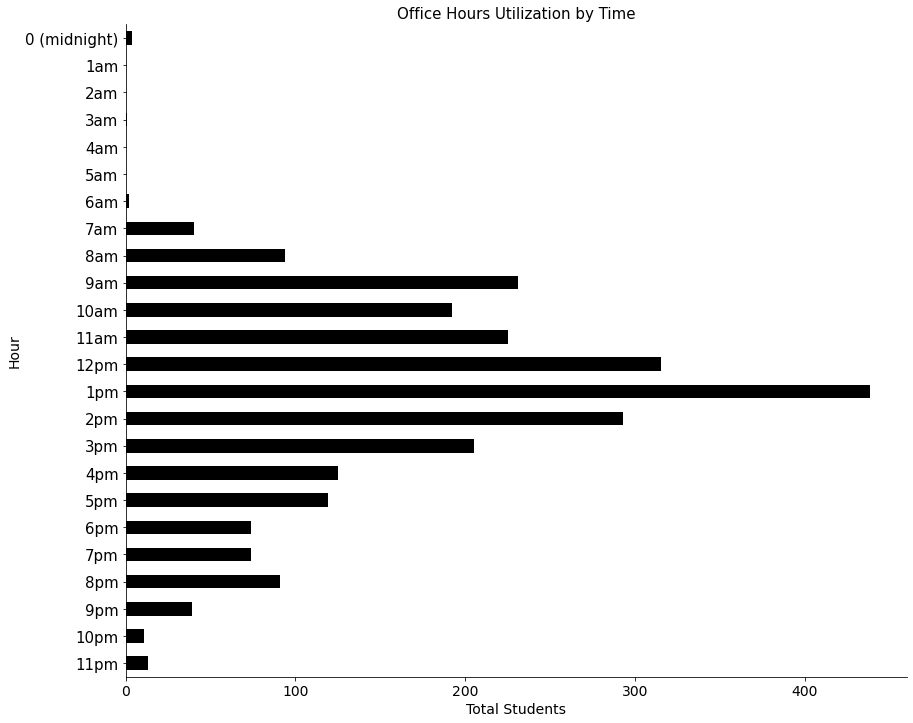

In [22]:
# 1: Display time attendance by table
def time_chart(chart=table, both='false'):
    date_dict = {}
    time_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
    staff_time_dict = {}
    stud_time_dict = {}
    for line in chart['First join']:

        date = line.split()[0]
        time = line.split()[1]
        hour = time.split(':')[0]
        if date not in date_dict:
            date_dict[date] = 1
        else:
            date_dict[date] += 1

        time_dict[int(hour)] += 1


    time_val = []
    for num in sorted(time_dict):
        time_val.append(time_dict[num])
    headers = sorted(time_dict)
    headers.reverse()
    time_val.reverse()

    for idx,val in enumerate(headers):
        if val==0:
            headers[idx] = str(val)+' (midnight)'
        elif val < 12:
            headers[idx] = str(val)+'am'
        elif val==12:
            headers[idx] = str(val)+'pm'
        else:
            headers[idx] = str(val-12)+'pm'
    xlabel = "Total Students and Moderators"
    if (chart.equals(mod_table)):
        xlabel = 'Total Moderators'
    if (chart.equals(presenter_table)):
        xlabel = 'Total Students'

    ax = get_ax(size=(14,12), font=14)
    ax = Series(time_val).plot.barh(ax=ax, color="0")
    ax.set_title('Office Hours Utilization by Time', fontsize=15)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Hour")
    ax.set_yticklabels(headers, fontsize=15)
    return ax


time_chart(presenter_table)

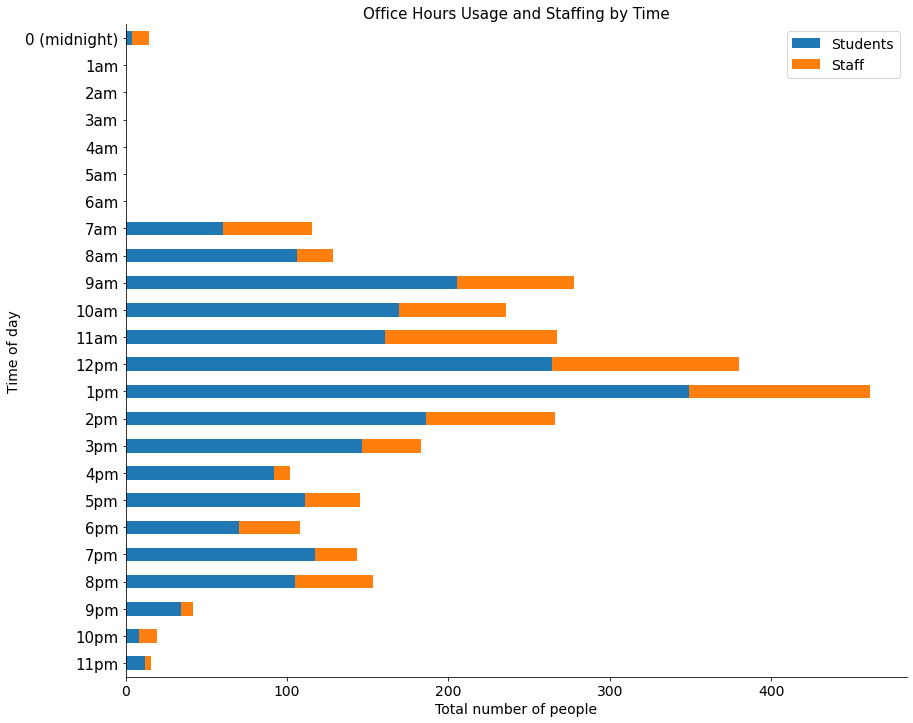

In [23]:
# 2: Utilization by Time (both students and mods)
date_dict = {}
staff_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
stud_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
for idx,line in table.iterrows():
    date = line['First join'].split()[0]
    time = line['First join'].split()[1]
    hour = time.split(':')[0]
    spent = convert_time(line['Total time'])
    if date not in date_dict:
        date_dict[date] = 1
    else:
        date_dict[date] += 1

    ########
    # add variable "spent" for total hours, or just append 1 for total people
    ########  
    if line['Role']=='Presenter':
        stud_dict[int(hour)] += spent
    else:
        staff_dict[int(hour)] += spent


stud_val = []
for num in sorted(stud_dict):
    stud_val.append(stud_dict[num])
mod_val = []
for num in sorted(staff_dict):
    mod_val.append(staff_dict[num])
headers = sorted(stud_dict)
headers.reverse()
stud_val.reverse()
mod_val.reverse()

for idx,val in enumerate(headers):
    if val==0:
        headers[idx] = str(val)+' (midnight)'
    elif val < 12:
        headers[idx] = str(val)+'am'
    elif val==12:
        headers[idx] = str(val)+'pm'
    else:
        headers[idx] = str(val-12)+'pm'
dfplt = pd.DataFrame({
    'Students': stud_val,
    'Staff': mod_val
},index=headers)
        
        

ax = get_ax(size=(14,12), font=14)
ax = dfplt.plot.barh(stacked=True, ax=ax)
ax.set_title('Office Hours Usage and Staffing by Time', fontsize=15)
ax.set_xlabel('Total number of people')
ax.set_ylabel("Time of day")
ax.set_yticklabels(headers, fontsize=15)
plt.show()

[8.35, -2.5500000000000007, 26.983333333333338, 56.399999999999956, 91.63333333333333, 32.300000000000004, 77.46666666666664, 82.19999999999997, 110.51666666666668, 105.6500000000002, 236.81666666666658, 148.3, 53.933333333333366, 103.21666666666668, 133.28333333333313, 84.13333333333331, 5.38333333333334, 0.5, 0, 0.0, -0.06666666666666667, 0, 0, -6.5166666666666675]


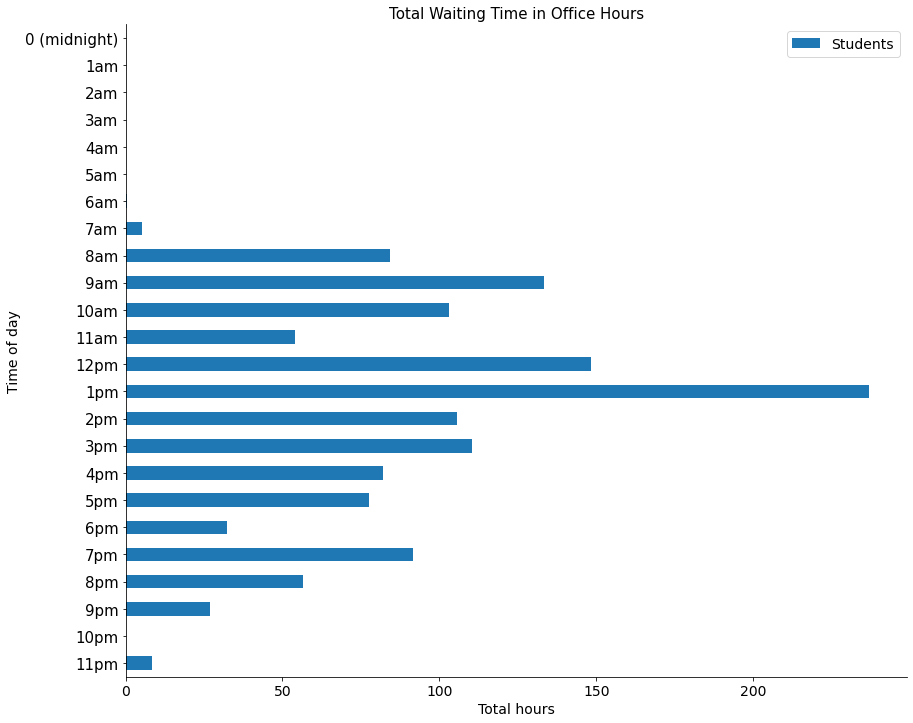

In [24]:
# 3: Total waiting time during time of day
wait_list = []
for idx,val in enumerate(stud_val):
    wait_list.append(stud_val[idx]-mod_val[idx])
print(wait_list)
dfplt = pd.DataFrame({
    'Students': wait_list
},index=headers)
        
        

ax = get_ax(size=(14,12), font=14)
ax = dfplt.plot.barh(stacked=True, ax=ax)
ax.set_title('Total Waiting Time in Office Hours', fontsize=15)
ax.set_xlabel('Total hours')
ax.set_ylabel("Time of day")
ax.set_yticklabels(headers, fontsize=15)
ax.set_xlim(0)
plt.show()

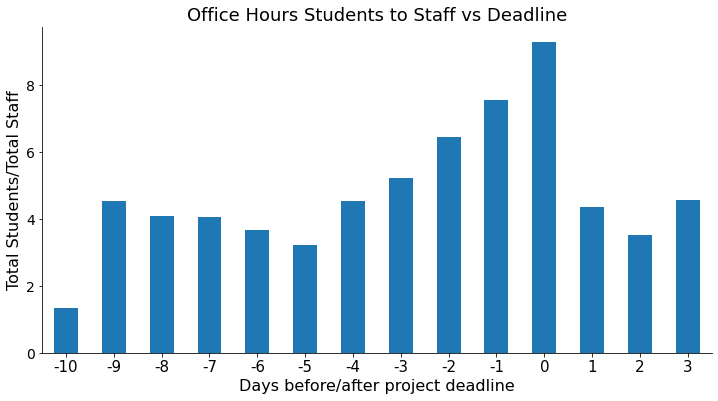

In [25]:
# Student-staff ratio vs number of days left before deadline
presenter_table
mod_table
presenter_people = {}
mod_people = {}
for idx,line in presenter_table.iterrows():
    days = line['Days before deadline']
    if days not in presenter_people:
        presenter_people[days] = 1
    else:
        presenter_people[days] += 1
for idx,line in mod_table.iterrows():
    days = line['Days before deadline']
    if days not in mod_people:
        mod_people[days] = 1
    else:
        mod_people[days] += 1

day_list = sorted(mod_people)
ratio_list = []
for day in day_list:
    if day in presenter_people and day in mod_people:
        ratio_list.append(presenter_people[day]/mod_people[day])
    else:
        ratio_list.append(-1)
day_list = day_list[0:-2]
day_list = [x * -1 for x in day_list]
ratio_list = ratio_list[0:-2]
#for idx,day in enumerate(day_list):
#    if day<0:
#        day_list[idx] = str(-1*day)+' day(s) after'
#    if day==0:
#        day_list[idx] = 'Day of Deadline'
#    if day>0:
#        day_list[idx] = str(day)+' day(s) before'

ratio_list.reverse()
day_list.reverse()
ax = get_ax(size=(12,6), font=14)
ax = Series(ratio_list[8:]).plot.bar(ax=ax)
ax.set_title('Office Hours Students to Staff vs Deadline', fontsize=18)
ax.set_ylabel('Total Students/Total Staff', fontsize=16)
ax.set_xlabel("Days before/after project deadline", fontsize=16)
ax.set_xticklabels(day_list[8:], fontsize=15, rotation=0)
plt.show()

In [53]:
pd.set_option('display.min_rows', 40)
date = '11/15/2020'
table[table['Days before deadline'] == 10] #and presenter_table['First join'].split()[0]==date]
time1 = '10:01:46'
time2 = '12:01:36'
stud_time = '11:36:56'
time2 < stud_time
table[(table['Join'] > time1) & (table['Join'] < time2)]

,Staff,Name,Role,First join,Last leave,Total time,Joins,Days before deadline,Date,Join,Leave
20,emma,4ba67e748af3cc22e0ebc1c522d3efe4,Presenter,10/14/2020 11:57:57,10/14/2020 12:56:16,00:58:18,1,5,10/14/2020,11:57:57,12:56:16
21,emma,b28d750da1cf3490bfff6b61798de4be,Presenter,10/14/2020 12:00:11,10/14/2020 12:56:16,00:56:04,1,5,10/14/2020,12:00:11,12:56:16
43,emma,f95fccea0c77a645cecb14458a27f5e8,Presenter,10/20/2020 11:48:30,10/20/2020 14:54:07,01:50:36,3,-1,10/20/2020,11:48:30,14:54:07
84,emma,255aeab935469aff64b39a8675fe6e4b,Presenter,10/28/2020 12:01:06,10/28/2020 13:03:10,01:02:04,1,2,10/28/2020,12:01:06,13:03:10
127,emma,4ba67e748af3cc22e0ebc1c522d3efe4,Presenter,10/07/2020 11:57:56,10/07/2020 13:05:38,00:33:23,3,0,10/07/2020,11:57:56,13:05:38
128,emma,eec08980831230e7de76ffd55a41c3b8,Presenter,10/07/2020 12:00:56,10/07/2020 12:46:45,00:45:36,3,0,10/07/2020,12:00:56,12:46:45
140,emma,5dfd348e5271db4d9e6ac8c540ad8689,Presenter,11/10/2020 11:55:00,11/10/2020 14:50:59,02:55:58,1,1,11/10/2020,11:55:00,14:50:59
141,emma,fc89668809212ce6975e1523b85c6f30,Presenter,11/10/2020 11:56:32,11/10/2020 13:28:49,01:31:39,2,1,11/10/2020,11:56:32,13:28:49
156,emma,4ba67e748af3cc22e0ebc1c522d3efe4,Presenter,11/11/2020 11:59:39,11/11/2020 12:58:32,00:58:32,2,0,11/11/2020,11:59:39,12:58:32
240,emma,255aeab935469aff64b39a8675fe6e4b,Presenter,11/04/2020 11:59:47,11/04/2020 12:57:20,00:45:24,2,7,11/04/2020,11:59:47,12:57:20


{-10: 0.6626027460164394, -9: 3.5786155608688017, -8: 4.3439878013843645, -7: 3.1728059688789045, -6: 2.947792030875475, -5: 2.956495582119285, -4: 2.9362330368408975, -3: 3.3287388858730367, -2: 5.458833701287345, -1: 11.535592400499551, 0: 7.431454056971628, 1: 2.5957248544308333, 2: 2.69587029354063, 3: 3.5240900726924416}
[0.6626027460164394, 3.5786155608688017, 4.3439878013843645, 3.1728059688789045, 2.947792030875475, 2.956495582119285, 2.9362330368408975, 3.3287388858730367, 5.458833701287345, 11.535592400499551, 7.431454056971628, 2.5957248544308333, 2.69587029354063, 3.5240900726924416]
[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3]


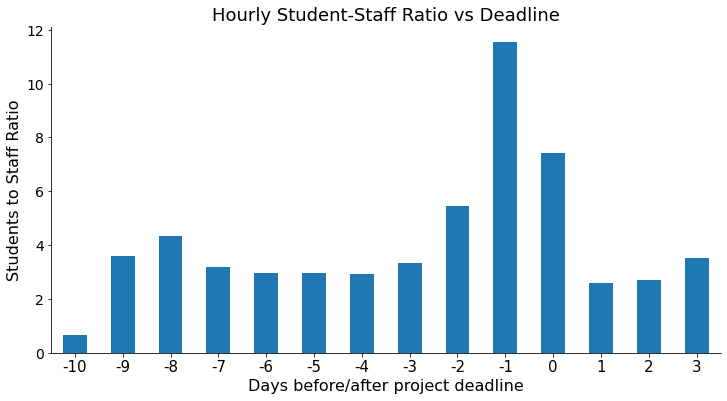

In [62]:
# Old method for calculating hourly ratio
# calculate hourly ratio = avg number of students in an hour / avg number of staff members in an hour
# avg num of students in an hour = total students/total hours spent by students
# avg num of staff in an hour = total staff members/total hours spent by staff

# New method for calculating hourly ratio
# For each moderator, add up number of 

presenter_table
mod_table
ratio_dict = {}
day_list = [10,9,8,7,6,5,4,3,2,1,0,-1,-2,-3]


for day in day_list:
    ratio_list = []
    for idx,line in mod_table[mod_table['Days before deadline']==day].iterrows():
        num_students = 0
        date = line['First join'].split()[0]
        time_join = line['First join'].split()[1]
        time_leave = line['Last leave'].split()[1]
        mod_hours = convert_time(line['Total time'])
        
        for idx,line in presenter_table[(presenter_table['Days before deadline']==day) & (presenter_table['Date']==date) & (presenter_table['Join'] > time_join) & (presenter_table['Join'] < time_leave)].iterrows():
            num_students += 1
        if (mod_hours!=0):
            ratio_list.append(num_students/mod_hours)
        
        #### PROBLEM HERE! Hours overlap. Ex: in a 1 hr session, if there are 3 students
        # and 1 staff, ratio should be 3:1. But if all students enter at the start together
        # then there is waiting time, and the avg student/hr = 3/3 hrs = 1, which is wrong!
        
        
        #print('num hours: '+str(num_hours)+", from line: "+line['Total time'])
        #print(line)
    #if num_hours == 0:
    #    print('error')
    #else:
    #    presenter_avg[-1*day] = num_people/num_hours
    ratio_dict[-1*day] = sum(ratio_list)/len(ratio_list)
    
print(ratio_dict)

vals = []
header = []
for val in ratio_dict:
    #print("days before deadline: "+str(val)+", ratio: "+str(presenter_avg[val]/mod_avg[val]))
    vals.append(ratio_dict[val])
    header.append(val)
print(vals)
print(header)

ax = get_ax(size=(12,6), font=14)
ax = Series(vals).plot.bar(ax=ax)
ax.set_title('Hourly Student-Staff Ratio vs Deadline', fontsize=18)
ax.set_ylabel('Students to Staff Ratio', fontsize=16)
ax.set_xlabel("Days before/after project deadline", fontsize=16)
ax.set_xticklabels(header, fontsize=15, rotation=0)
plt.show()


In [56]:
ll = [3,4,5,5,3]
sum(ll)/len(ll)

4.0